In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import tree
import graphviz
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
import tensorflow as tf
from keras.utils.vis_utils import plot_model

## About Dataset

Worldwide, breast cancer is the most common type of cancer in women and the second highest in terms of mortality rates.Diagnosis of breast cancer is performed when an abnormal lump is found (from self-examination or x-ray) or a tiny speck of calcium is seen (on an x-ray). After a suspicious lump is found, the doctor will conduct a diagnosis to determine whether it is cancerous and, if so, whether it has spread to other parts of the body.

In [2]:
df = pd.read_csv('Breast_cancer_data.csv')

In [3]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
df.shape

(569, 6)

The total number of data is equal to 569

In [5]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


The number of each feature is equal to the total number, so we don't have any missing value.

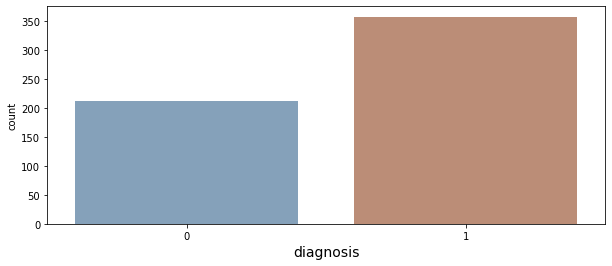

In [6]:
plt.figure(figsize=(10,4))
sns.countplot(x='diagnosis' , data=df ,palette='twilight_shifted')
plt.xlabel('diagnosis', fontsize=14)
plt.show()

In [7]:
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

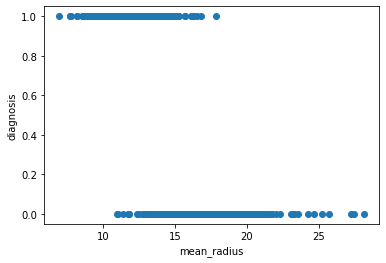

In [8]:
plt.scatter(df['mean_radius'], df['diagnosis'])
plt.xlabel('mean_radius')
plt.ylabel('diagnosis')
plt.show()

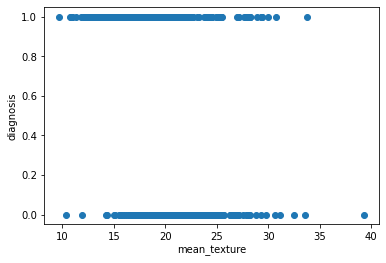

In [9]:
plt.scatter(df['mean_texture'], df['diagnosis'])
plt.xlabel('mean_texture')
plt.ylabel('diagnosis')
plt.show()

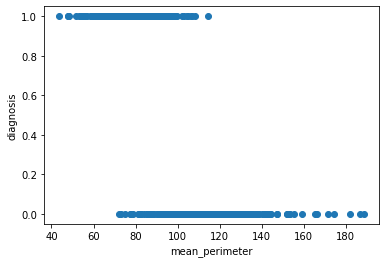

In [10]:
plt.scatter(df['mean_perimeter'], df['diagnosis'])
plt.xlabel('mean_perimeter')
plt.ylabel('diagnosis')
plt.show()

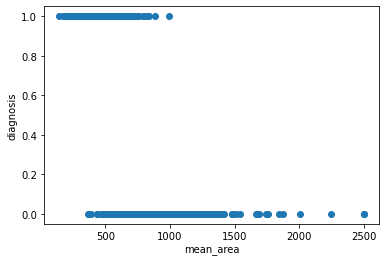

In [11]:
plt.scatter(df['mean_area'], df['diagnosis'])
plt.xlabel('mean_area')
plt.ylabel('diagnosis')
plt.show()

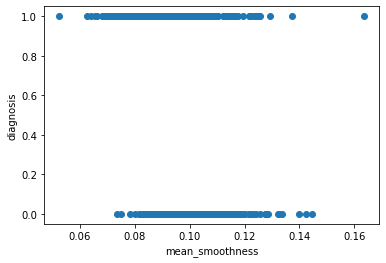

In [12]:
plt.scatter(df['mean_smoothness'], df['diagnosis'])
plt.xlabel('mean_smoothness')
plt.ylabel('diagnosis')
plt.show()

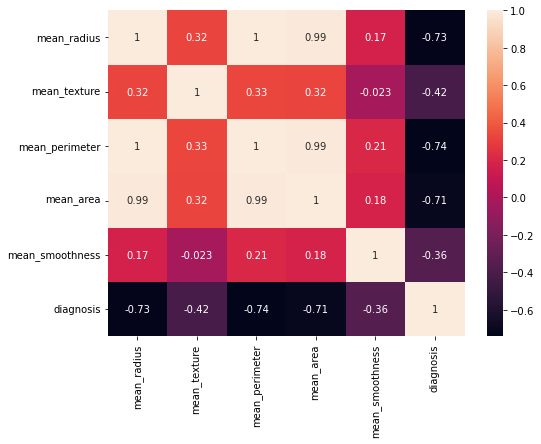

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

<AxesSubplot:xlabel='mean_smoothness', ylabel='Density'>

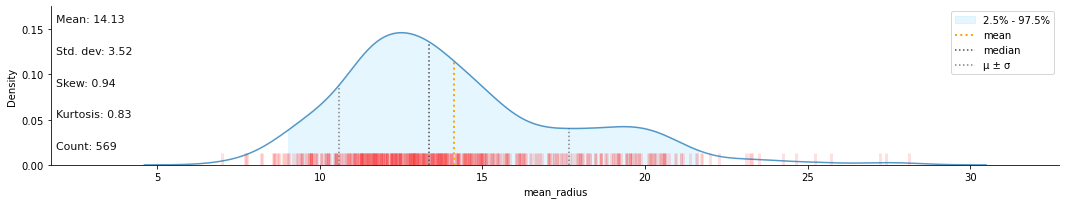

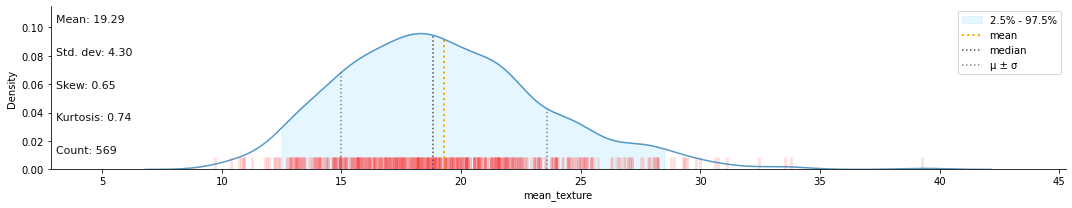

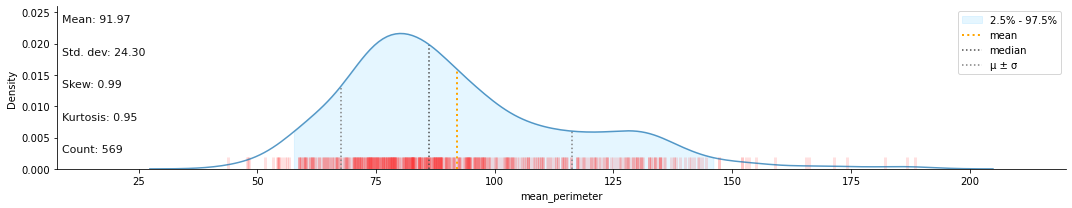

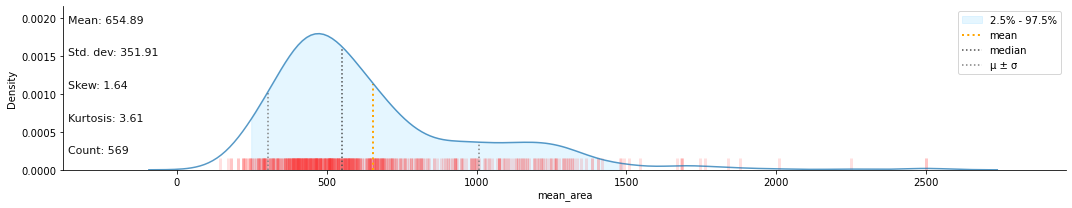

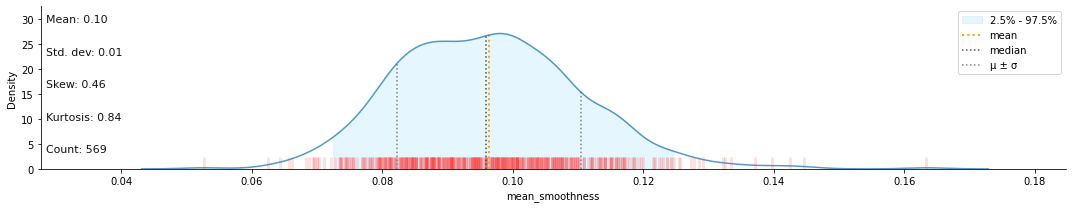

In [14]:
klib.dist_plot(df)

In [15]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

We consider 80% of the data as training data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [17]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## naive bayses

In [18]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train);

In [19]:
y_pred = nb_model.predict(X_test)

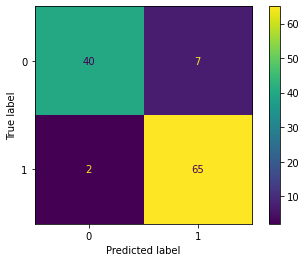

In [20]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

## logestic reg

In [21]:
lg_model=LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred1=lg_model.predict(X_test)

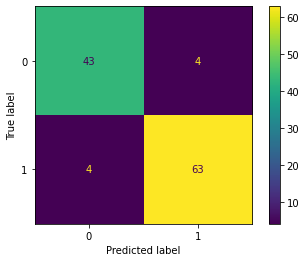

In [23]:
confusion_matrix1 = metrics.confusion_matrix(y_test, y_pred1)
cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1)
cm_display1.plot()
plt.show()

## desision tree

In [24]:
dt_model = DecisionTreeClassifier()   
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
y_pred2=lg_model.predict(X_test)

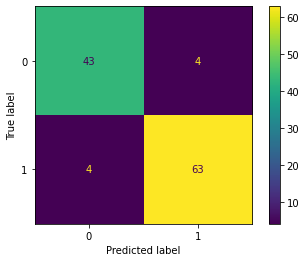

In [26]:
confusion_matrix2 = metrics.confusion_matrix(y_test, y_pred2)
cm_display2 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2)
cm_display2.plot()
plt.show()

In [27]:
target = ['0','1']
feature_names = list(X.columns)

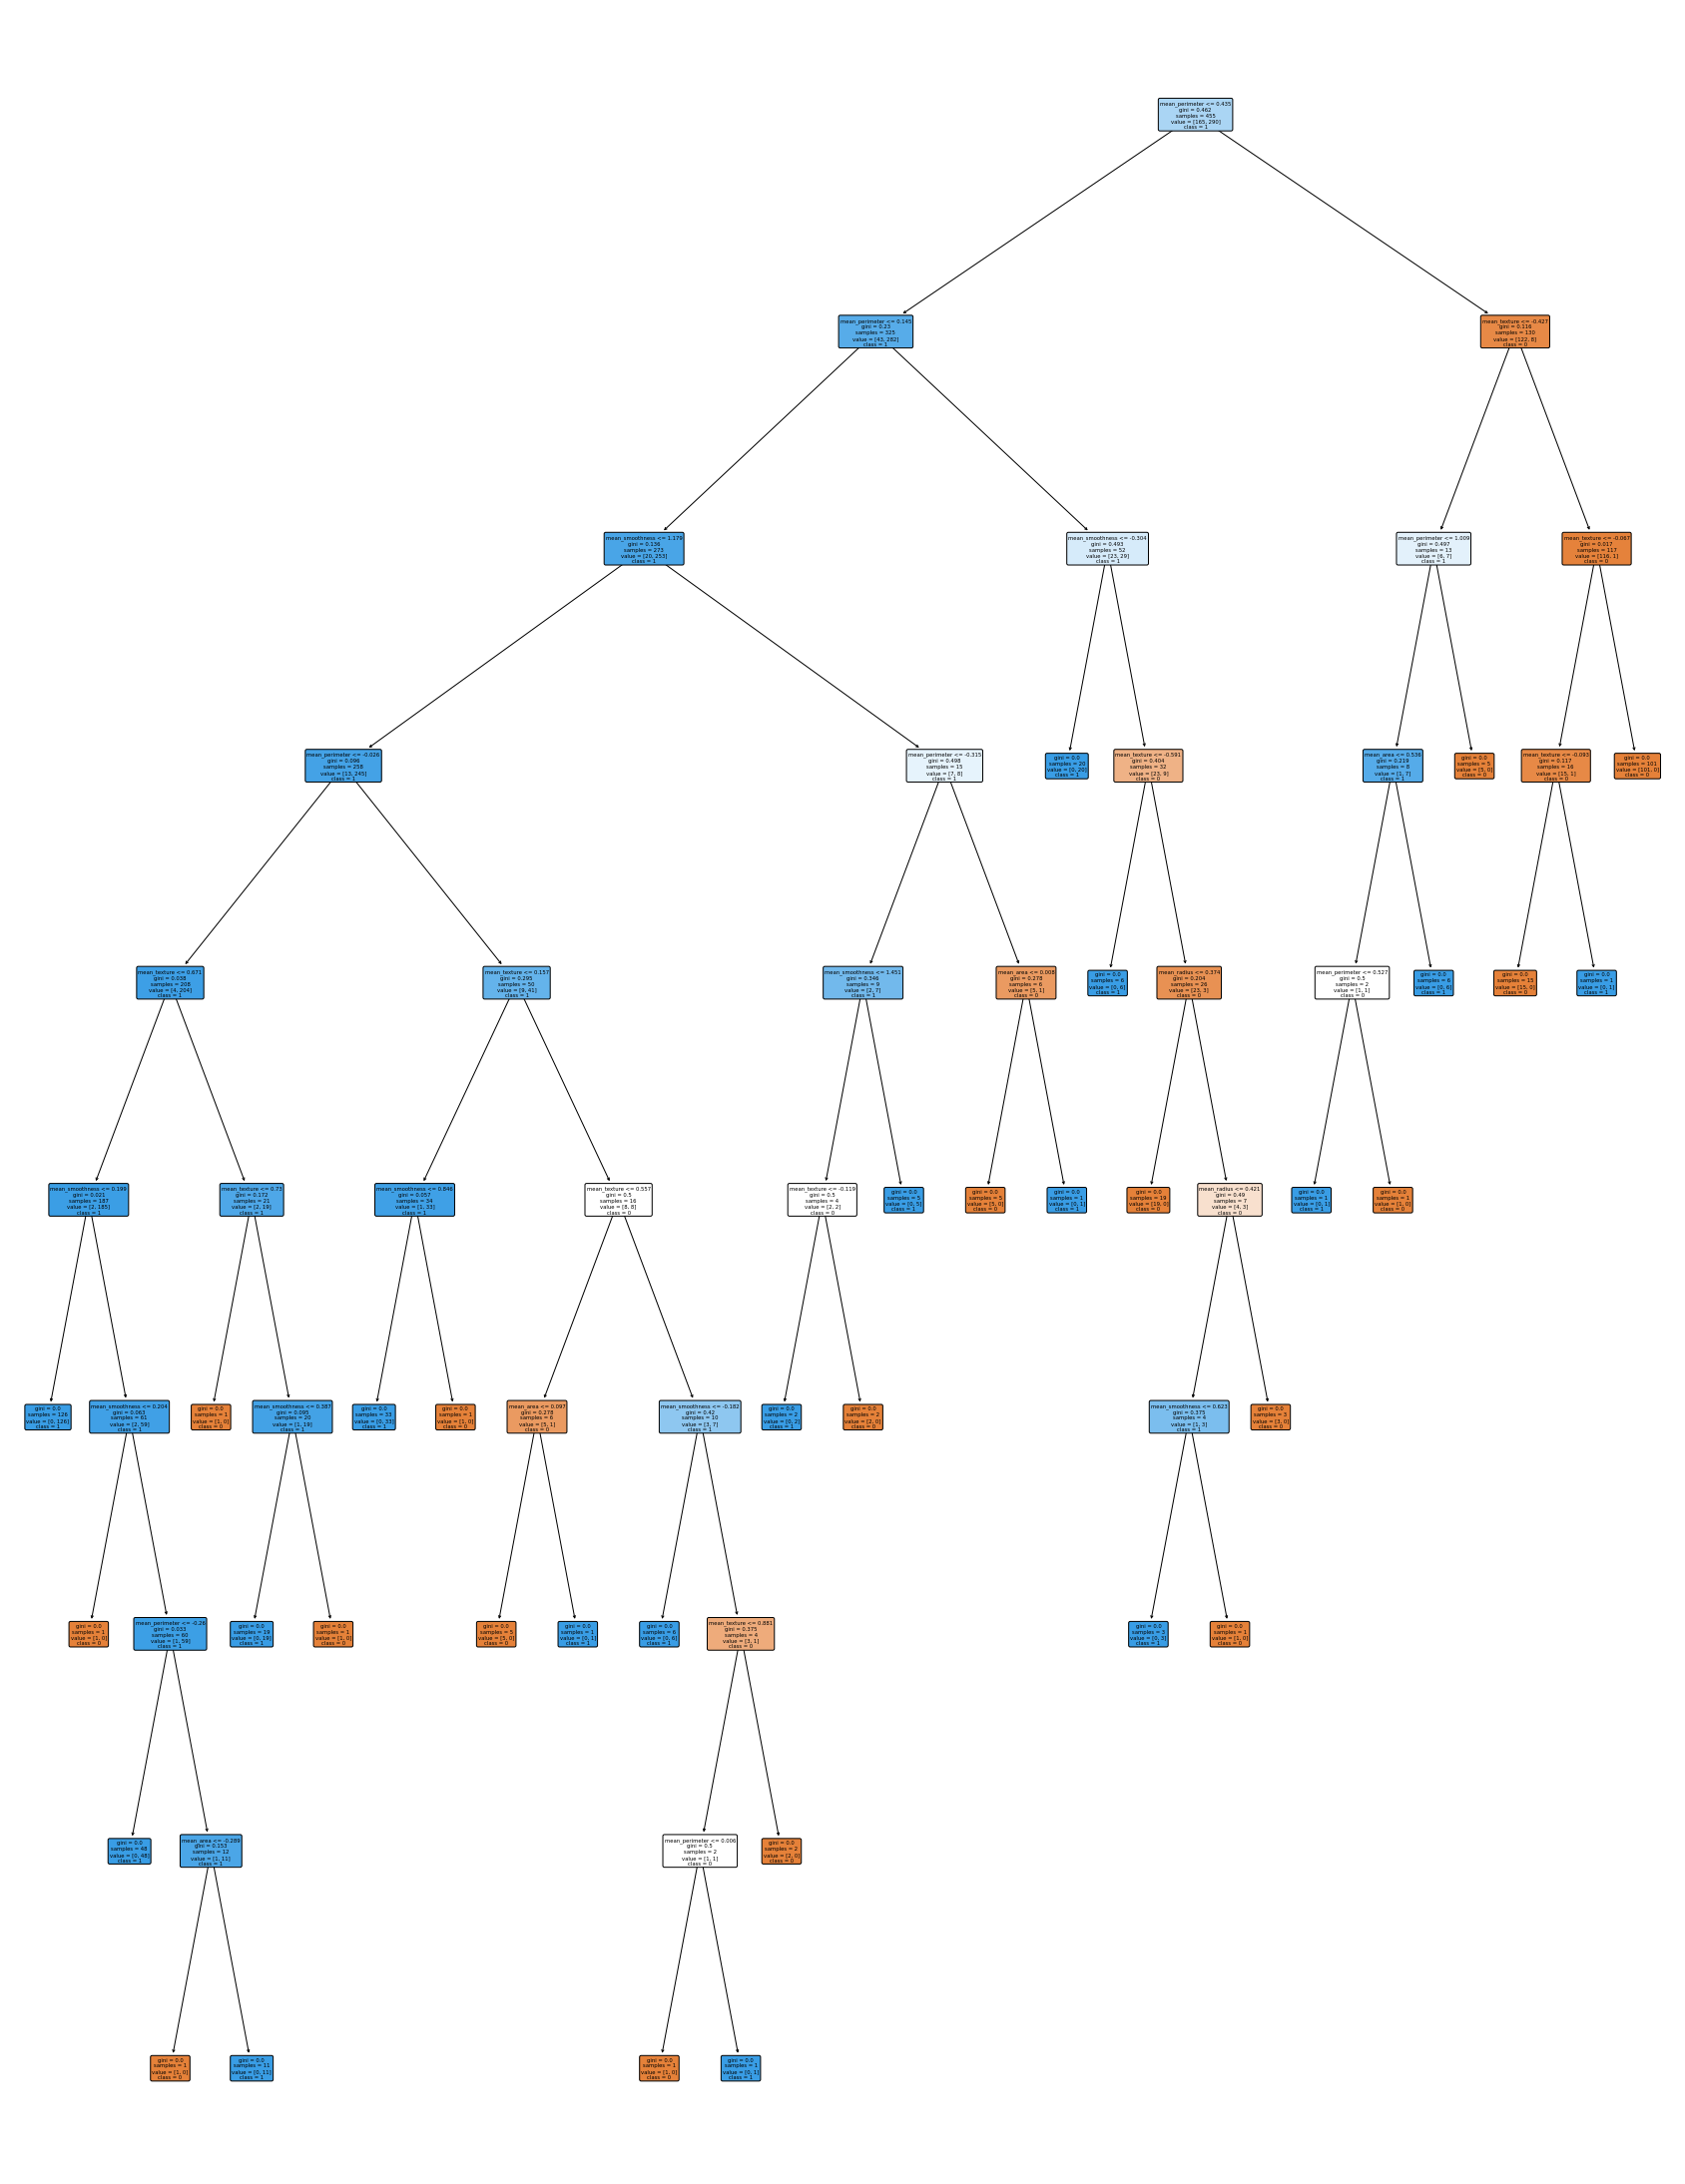

In [28]:
fig = plt.figure(figsize=(30,40))
_ = tree.plot_tree(dt_model, 
                   feature_names=feature_names,  
                   class_names=target,
                   filled=True,
                  rounded=True,
              
                  )

## svm

In [29]:
svm_model =svm.SVC()
svm_model.fit(X_train,y_train)

SVC()

In [30]:
y_pred3 = svm_model.predict(X_test)

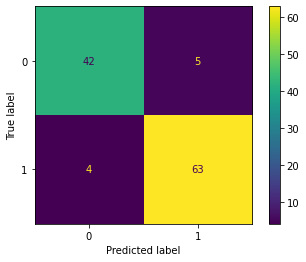

In [31]:
confusion_matrix3 = metrics.confusion_matrix(y_test, y_pred3)
cm_display3 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix3)
cm_display3.plot()
plt.show()

## ANN

In [32]:
ann = tf.keras.models.Sequential()

In [33]:
ann.add(tf.keras.layers.Flatten(input_shape=(5,)))

In [34]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [35]:
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [36]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [37]:
history = ann.fit(X_train,y_train,validation_split=0.2,epochs = 30)

Epoch 1/30
12/12 [==============================] - 1s 26ms/step - loss: 0.5446 - accuracy: 0.7445 - val_loss: 0.5096 - val_accuracy: 0.7473
Epoch 2/30
12/12 [==============================] - 0s 4ms/step - loss: 0.5310 - accuracy: 0.7940 - val_loss: 0.4972 - val_accuracy: 0.8022
Epoch 3/30
12/12 [==============================] - 0s 4ms/step - loss: 0.5174 - accuracy: 0.8269 - val_loss: 0.4851 - val_accuracy: 0.8022
Epoch 4/30
12/12 [==============================] - 0s 4ms/step - loss: 0.5040 - accuracy: 0.8489 - val_loss: 0.4733 - val_accuracy: 0.8242
Epoch 5/30
12/12 [==============================] - 0s 4ms/step - loss: 0.4910 - accuracy: 0.8764 - val_loss: 0.4613 - val_accuracy: 0.8242
Epoch 6/30
12/12 [==============================] - 0s 5ms/step - loss: 0.4778 - accuracy: 0.8874 - val_loss: 0.4495 - val_accuracy: 0.8352
Epoch 7/30
12/12 [==============================] - 0s 4ms/step - loss: 0.4650 - accuracy: 0.8929 - val_loss: 0.4380 - val_accuracy: 0.8462
Epoch 8/30
12/12 [=

Text(0.5, 0, 'epoch')

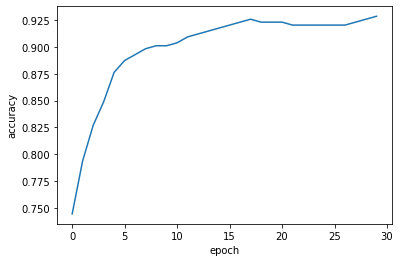

In [38]:
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

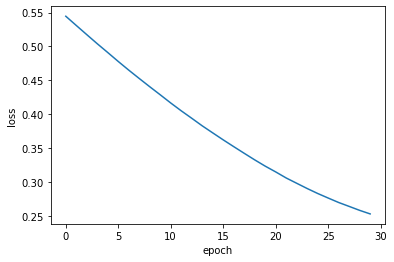

In [39]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

In [40]:
print(ann.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 5)                 0         
                                                                 
 dense (Dense)               (None, 6)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________
None


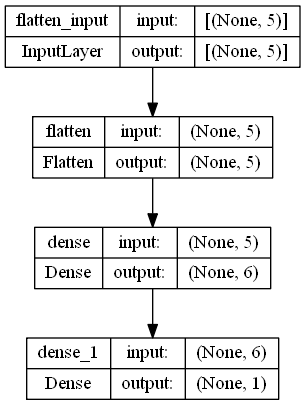

In [41]:
plot_model(ann, to_file='mode.png', show_shapes=True, show_layer_names=True)